In [20]:
def isInLeftTopQuadrant(robot):
    return robot['position'][0] < (gridSize[0]-1)/2 and robot['position'][1] < (gridSize[1]-1)/2
def isInRightTopQuadrant(robot):
    return robot['position'][0] > (gridSize[0]-1)/2 and robot['position'][1] < (gridSize[1]-1)/2
def isInLeftBottomQuadrant(robot):
    return robot['position'][0] < (gridSize[0]-1)/2 and robot['position'][1] > (gridSize[1]-1)/2
def isInRightBottomQuadrant(robot):
    return robot['position'][0] > (gridSize[0]-1)/2 and robot['position'][1] > (gridSize[1]-1)/2

def moveRobot(robot):
    X = int(robot['position'][0]) + int(robot['horizontalVelocity'])
    Y = int(robot['position'][1]) + int(robot['verticalVelocity'])
    
    if X<0:
        X = (gridSize[0]) + X
    elif X>=(gridSize[0]):
        X = X - (gridSize[0])

    if Y<0:
        Y = (gridSize[1]) + Y
    elif Y>=(gridSize[1]):
        Y = Y - (gridSize[1])

    robot['position'] = X, Y


with open('input_14.txt', 'r') as f:
    inputData = f.readlines()

robots = []

for lineIndex in range(len(inputData)):
    line = inputData[lineIndex].strip()
    robot = {}
    robot['position']=(line.split(' ')[0].replace('p=','').split(',')[0], line.split(' ')[0].replace('p=','').split(',')[1])
    robot['horizontalVelocity']=line.split(' ')[1].replace('v=','').split(',')[0]
    robot['verticalVelocity']=line.split(' ')[1].replace('v=','').split(',')[1]
    robots.append(robot)
    
print(robots)

gridSize = (101, 103)
# gridSize = (11, 7)


for robot in robots:
    for i in range(100):
        moveRobot(robot)
        # print('position after ' + str(i+1) + ' moves ' + str(robot['position']))

print('robots after 100 moves')
print('robots size ' + str(len(robots)))

for robot in robots:
    print(robot['position'])    


#Count robot in each quadrant
totalQuadrants = [0,0,0,0]
for robot in robots:
    if isInLeftTopQuadrant(robot):
        totalQuadrants[0] += 1
    elif isInRightTopQuadrant(robot):
        totalQuadrants[1] += 1
    elif isInLeftBottomQuadrant(robot):
        totalQuadrants[2] += 1
    elif isInRightBottomQuadrant(robot):
        totalQuadrants[3] += 1

print(totalQuadrants)

total = totalQuadrants[0] * totalQuadrants[1] * totalQuadrants[2] * totalQuadrants[3]
print(total)


[{'position': ('98', '102'), 'horizontalVelocity': '52', 'verticalVelocity': '-49'}, {'position': ('36', '69'), 'horizontalVelocity': '19', 'verticalVelocity': '-95'}, {'position': ('32', '43'), 'horizontalVelocity': '23', 'verticalVelocity': '1'}, {'position': ('53', '78'), 'horizontalVelocity': '-68', 'verticalVelocity': '-28'}, {'position': ('57', '68'), 'horizontalVelocity': '58', 'verticalVelocity': '99'}, {'position': ('55', '75'), 'horizontalVelocity': '13', 'verticalVelocity': '83'}, {'position': ('71', '101'), 'horizontalVelocity': '33', 'verticalVelocity': '93'}, {'position': ('13', '92'), 'horizontalVelocity': '-74', 'verticalVelocity': '78'}, {'position': ('47', '96'), 'horizontalVelocity': '66', 'verticalVelocity': '-70'}, {'position': ('89', '12'), 'horizontalVelocity': '39', 'verticalVelocity': '-13'}, {'position': ('100', '64'), 'horizontalVelocity': '43', 'verticalVelocity': '-78'}, {'position': ('47', '91'), 'horizontalVelocity': '13', 'verticalVelocity': '-88'}, {'po

[{'position': ('98', '102'), 'horizontalVelocity': '52', 'verticalVelocity': '-49'}, {'position': ('36', '69'), 'horizontalVelocity': '19', 'verticalVelocity': '-95'}, {'position': ('32', '43'), 'horizontalVelocity': '23', 'verticalVelocity': '1'}, {'position': ('53', '78'), 'horizontalVelocity': '-68', 'verticalVelocity': '-28'}, {'position': ('57', '68'), 'horizontalVelocity': '58', 'verticalVelocity': '99'}, {'position': ('55', '75'), 'horizontalVelocity': '13', 'verticalVelocity': '83'}, {'position': ('71', '101'), 'horizontalVelocity': '33', 'verticalVelocity': '93'}, {'position': ('13', '92'), 'horizontalVelocity': '-74', 'verticalVelocity': '78'}, {'position': ('47', '96'), 'horizontalVelocity': '66', 'verticalVelocity': '-70'}, {'position': ('89', '12'), 'horizontalVelocity': '39', 'verticalVelocity': '-13'}, {'position': ('100', '64'), 'horizontalVelocity': '43', 'verticalVelocity': '-78'}, {'position': ('47', '91'), 'horizontalVelocity': '13', 'verticalVelocity': '-88'}, {'po

KeyboardInterrupt: 

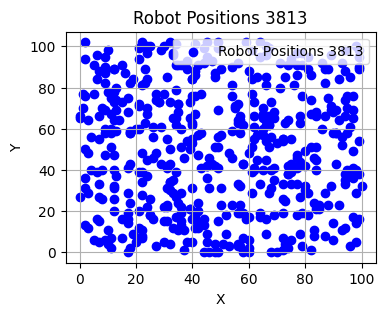

In [36]:
import matplotlib.pyplot as plt
import os

def hasSimetric(robots):
    totalQuadrants = [0,0,0,0]
    for robot in robots:
        if isInLeftTopQuadrant(robot):
            totalQuadrants[0] += 1
        elif isInRightTopQuadrant(robot):
            totalQuadrants[1] += 1
        elif isInLeftBottomQuadrant(robot):
            totalQuadrants[2] += 1
        elif isInRightBottomQuadrant(robot):
            totalQuadrants[3] += 1    

    return totalQuadrants[0] == totalQuadrants[1] and totalQuadrants[2] == totalQuadrants[3]

def plot_robot_positions(robots, plot_number):
    positions = [robot['position'] for robot in robots]

    # Extract X and Y coordinates
    x_coords = [pos[0] for pos in positions]
    y_coords = [pos[1] for pos in positions]

    # Create the plot
    plt.figure(figsize=(4, 3))  # Adjust the figure size to make it smaller
    plt.scatter(x_coords, y_coords, c='blue', label=f'Robot Positions {plot_number}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Robot Positions {plot_number}')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join('robotPositions', f'robot_positions_{i+1}.png'))  # Save each plot as an image in the directory
    plt.close()


def isInLeftTopQuadrant(robot):
    return robot['position'][0] < (gridSize[0]-1)/2 and robot['position'][1] < (gridSize[1]-1)/2
def isInRightTopQuadrant(robot):
    return robot['position'][0] > (gridSize[0]-1)/2 and robot['position'][1] < (gridSize[1]-1)/2
def isInLeftBottomQuadrant(robot):
    return robot['position'][0] < (gridSize[0]-1)/2 and robot['position'][1] > (gridSize[1]-1)/2
def isInRightBottomQuadrant(robot):
    return robot['position'][0] > (gridSize[0]-1)/2 and robot['position'][1] > (gridSize[1]-1)/2

def moveRobot(robot):
    X = int(robot['position'][0]) + int(robot['horizontalVelocity'])
    Y = int(robot['position'][1]) + int(robot['verticalVelocity'])
    
    if X<0:
        X = (gridSize[0]) + X
    elif X>=(gridSize[0]):
        X = X - (gridSize[0])

    if Y<0:
        Y = (gridSize[1]) + Y
    elif Y>=(gridSize[1]):
        Y = Y - (gridSize[1])

    robot['position'] = X, Y


with open('input_14.txt', 'r') as f:
    inputData = f.readlines()

robots = []

for lineIndex in range(len(inputData)):
    line = inputData[lineIndex].strip()
    robot = {}
    robot['position']=(line.split(' ')[0].replace('p=','').split(',')[0], line.split(' ')[0].replace('p=','').split(',')[1])
    robot['horizontalVelocity']=line.split(' ')[1].replace('v=','').split(',')[0]
    robot['verticalVelocity']=line.split(' ')[1].replace('v=','').split(',')[1]
    robots.append(robot)
    
print(robots)

gridSize = (101, 103)
# gridSize = (11, 7)


for i in range(10000):
    for robot in robots:
        moveRobot(robot)
    print(str(i+1) + ' seconds elapsed')
    plot_robot_positions(robots, i+1)
        # print('position after ' + str(i+1) + ' moves ' + str(robot['position']))

# print('robots after 100 moves')
# print('robots size ' + str(len(robots)))

# for robot in robots:
#     print(robot['position'])    


